In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import pandas as pd

vl_df=pd.read_csv("Cleaned_data.csv")
gun_vl_df=vl_df
state_agg=gun_vl_df.groupby('state').agg({'n_killed':sum,'n_injured':sum}).reset_index().sort_values(by='state')
gun_ownership=pd.read_excel("Gun Ownership.xlsx",index=False)

In [3]:
ownership_and_crimes=gun_ownership.merge(state_agg,left_on='State',right_on='state')

In [4]:
ownership_and_crimes.head()

,Rank,State,guns per capita,guns registered,state,n_killed,n_injured
0,1,Wyoming,229.24,132806,Wyoming,73,52
1,2,District of Columbia,68.05,47228,District of Columbia,447,1383
2,3,New Hampshire,46.76,64135,New Hampshire,88,144
3,4,New Mexico,46.73,97580,New Mexico,490,539
4,5,Virginia,36.34,307822,Virginia,1456,3537


#### Gun ownership & Gun Violence

In [6]:
population=pd.read_csv("Population.csv")
ownership_vl=population.merge(ownership_and_crimes,how="right",on="State")
ownership_vl.head()

ownership_vl['guns per capita_2']=ownership_vl['guns registered']/ownership_vl['Population']
ownership_vl.head()



,State,Population,Rank,guns per capita,guns registered,state,n_killed,n_injured,guns per capita_2
0,Alabama,4887871,6,33.15,161641,Alabama,1877,2989,0.033070
1,Alaska,737438,15,21.38,15824,Alaska,267,325,0.021458
2,Arizona,7171646,10,25.61,179738,Arizona,1086,1080,0.025062
3,Arkansas,3013825,8,26.57,79841,Arkansas,773,1347,0.026492
4,California,39557045,44,8.71,344622,California,5516,7505,0.008712


In [8]:
state_ab=pd.read_csv("State_Abrv.csv")

In [9]:
ownership_vl=ownership_vl.merge(state_ab,on="State",how="left")
ownership_vl

,State,Population,Rank,guns per capita,guns registered,state,n_killed,n_injured,guns per capita_2,Abbrev,Code
0,Alabama,4887871,6,33.150,161641,Alabama,1877,2989,0.033070,Ala.,AL
1,Alaska,737438,15,21.380,15824,Alaska,267,325,0.021458,Alaska,AK
2,Arizona,7171646,10,25.610,179738,Arizona,1086,1080,0.025062,Ariz.,AZ
3,Arkansas,3013825,8,26.570,79841,Arkansas,773,1347,0.026492,Ark.,AR
4,California,39557045,44,8.710,344622,California,5516,7505,0.008712,Calif.,CA
5,Colorado,5695564,28,16.480,92435,Colorado,792,1124,0.016229,Colo.,CO
6,Connecticut,3572665,14,22.960,82400,Connecticut,339,1245,0.023064,Conn.,CT
7,Delaware,967171,49,5.040,4852,Delaware,214,843,0.005017,Del.,DE
8,District of Columbia,702455,2,68.050,47228,District of Columbia,447,1383,0.067233,D.C.,DC
9,Florida,21299325,29,16.350,343288,Florida,3887,7036,0.016117,Fla.,FL


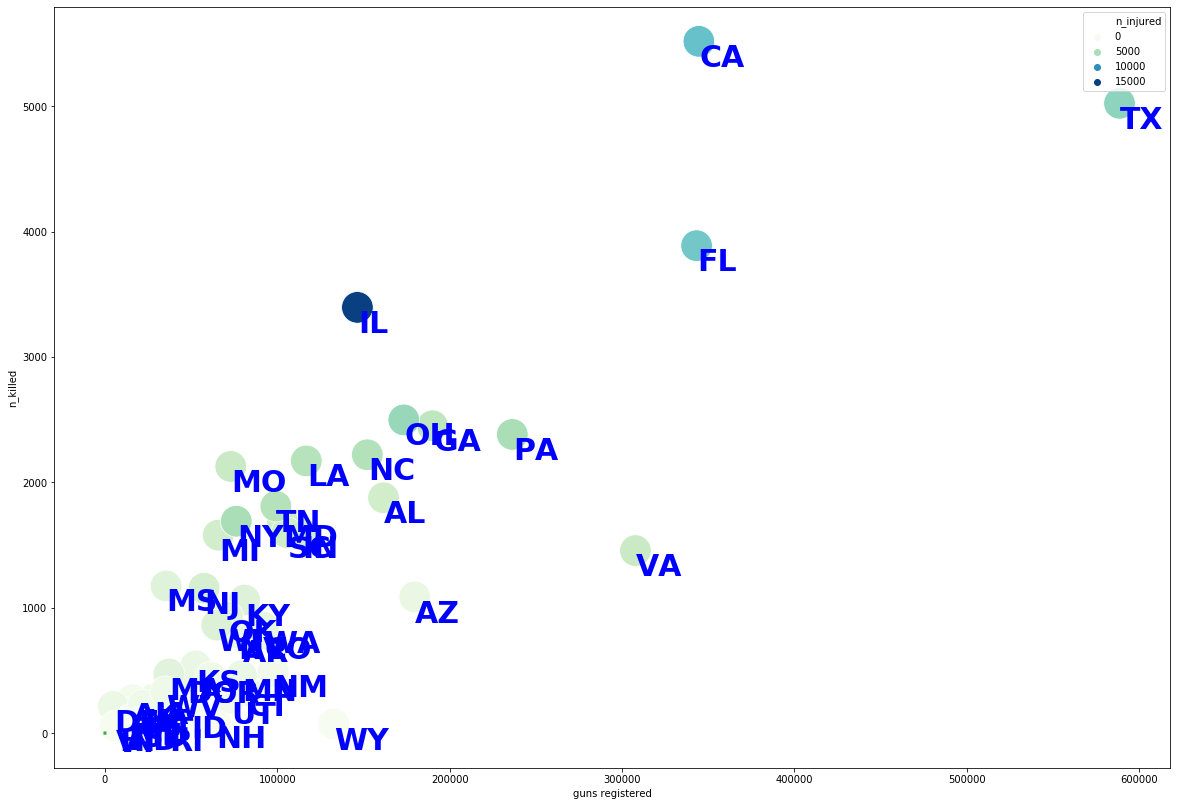

In [10]:
import seaborn as sns
plt.figure(figsize=(20, 14))
ax=sns.scatterplot(x='guns registered',y='n_killed',data=ownership_vl,hue='n_injured',s=1000,palette="GnBu")
ax.grid(False)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+300, point['y']-200, str(point['val']),color="blue",size=30,weight='bold')

label_point(ownership_vl['guns registered'], ownership_vl['n_killed'], ownership_vl['Code'], plt.gca())

ax.figure.savefig("Registered.png")
plt.plot([0, 1], [0, 2], sns.xkcd_rgb["medium green"], lw=3)

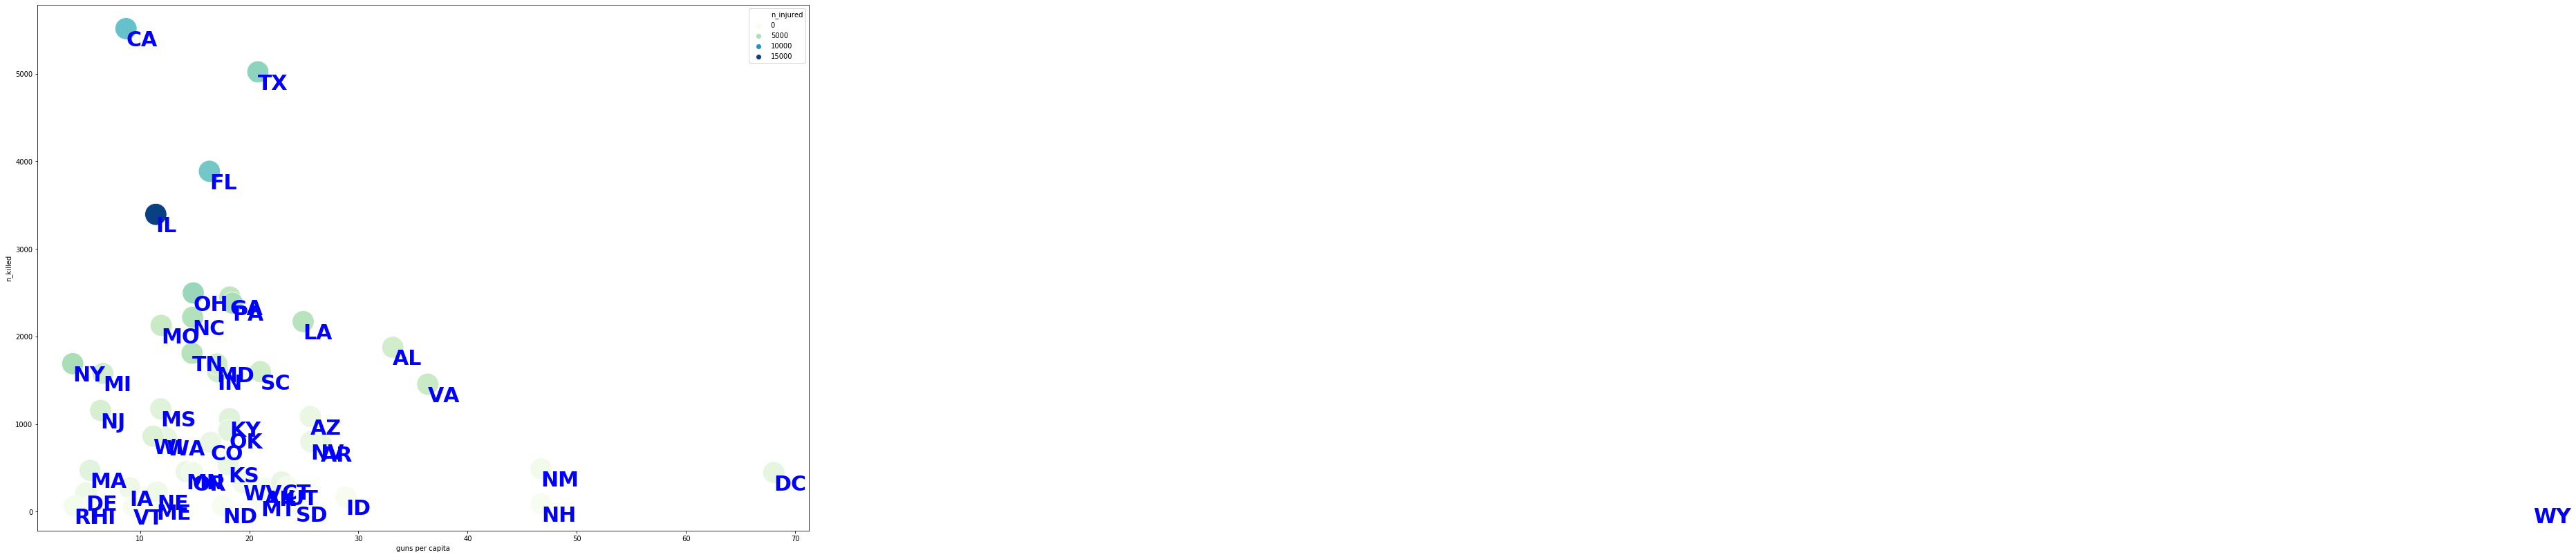

In [11]:
plt.figure(figsize=(20, 14))
ax=sns.scatterplot(x='guns per capita',y='n_killed',data=ownership_vl[ownership_vl['State']!='Wyoming'],hue='n_injured',s=1000,palette="GnBu")
ax.grid(False)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y']-200, str(point['val']),color="blue",size=30,weight='bold')

label_point(ownership_vl['guns per capita'], ownership_vl['n_killed'], ownership_vl['Code'], plt.gca())

ax.figure.savefig("Guns Per 1000.png")

### Correlation with laws

In [12]:
import pandas as pd
law_categories=pd.read_excel("Laws.xlsx",sheet_name="Codebook",index=False)

gun_laws=pd.read_excel("Laws.xlsx",sheet_name="Database",index=False)

gun_laws=gun_laws[gun_laws['year']>=2014]

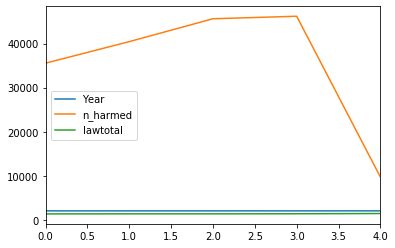

In [15]:
lawtotal_df=gun_laws.groupby(['year']).agg({'lawtotal':sum}).reset_index()

vl_df=pd.read_csv("Cleaned_data.csv")


vl_df['n_harmed']=vl_df['n_killed']+vl_df['n_injured']
vl_agg=vl_df.groupby(['Year']).agg({'n_harmed':sum}).reset_index()
total_vl=vl_agg.merge(lawtotal_df,left_on="Year",right_on="year").drop(columns=['year'])
total_vl.plot()

In [16]:
total_vl.corr()['n_harmed']

Year       -0.482271
n_harmed    1.000000
lawtotal   -0.798083
Name: n_harmed, dtype: float64

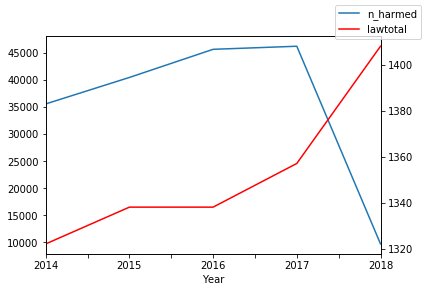

In [17]:
total_vl['Year']=total_vl['Year'].map(lambda x : str(x))
ax = total_vl.plot(x="Year", y="n_harmed", legend=False)
ax2 = ax.twinx()
total_vl.plot(x="Year", y="lawtotal", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

In [18]:
gun_laws_melt=gun_laws.melt(id_vars=gun_laws.columns[0:2], 
        var_name="Variable Name", 
        value_name="Flag")

gun_laws_merged=gun_laws_melt.merge(law_categories,on="Variable Name",how="left")
gun_laws_merged.to_csv("Gun Laws and Categories.csv",index=False)
laws_years_df=gun_laws_merged.groupby(['year','Category']).agg({'Flag':sum}).reset_index()
laws_years_df=laws_years_df.pivot('year','Category','Flag').reset_index()

vl_laws=vl_agg.merge(laws_years_df,left_on="Year",right_on="year").drop(columns=['year'])

vl_laws.drop(columns=['Year']).corr()['n_harmed']

n_harmed                                        1.000000
Ammunition regulations                         -0.957834
Assault weapons and large-capacity magazines   -0.849418
Background checks                              -0.719224
Buyer regulations                              -0.937062
Child access prevention                              NaN
Concealed carry permitting                      0.257611
Dealer regulations                             -0.957834
Domestic violence                              -0.529558
Gun trafficking                                -0.001640
Immunity                                             NaN
Possession regulations                         -0.959372
Preemption                                           NaN
Prohibitions for high-risk gun possession      -0.447327
Stand your ground                               0.711256
Name: n_harmed, dtype: float64

In [20]:
vl_df=vl_df[vl_df['date']>='2017-01-01'][vl_df['date']<='2017-12-31']

C:\Users\rawin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [21]:
vl_df.date.max()

'2017-12-31'

In [22]:
state_agg_year=vl_df.groupby(['state','Year']).agg({'n_killed':sum,'n_injured':sum}).reset_index().sort_values(by='state')
laws_and_vl=state_agg_year.merge(gun_laws_merged,left_on=['Year','state'],right_on=['year','state'])

In [23]:
laws_years_df=gun_laws_merged.groupby(['year','Category']).agg({'Flag':sum}).reset_index()
laws_years_df=laws_years_df.pivot('year','Category','Flag').reset_index()

In [25]:
laws_years_df.head()

Category,year,Ammunition regulations,Assault weapons and large-capacity magazines,Background checks,Buyer regulations,Child access prevention,Concealed carry permitting,Dealer regulations,Domestic violence,Gun trafficking,Immunity,Possession regulations,Preemption,Prohibitions for high-risk gun possession,Stand your ground
0,2014,36,37,123,120,82,196,135,207,38,17,128,20,156,27
1,2015,36,37,127,120,82,190,135,218,39,17,129,20,161,27
2,2016,36,37,128,120,82,181,135,228,39,17,128,20,161,26
3,2017,36,38,134,121,82,171,135,250,39,17,128,20,161,25
4,2018,37,40,144,130,82,172,136,264,39,17,140,20,164,23
